**Problem 1: Visualize a static map**


***Travel times to Jumbo shopping center by car***

In [98]:
import pandas as pd
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt

# Read files
grid = gpd.read_file('/home/jovyan/work/exercise-4-taigako/data/MetropAccess_YKR_grid_EurefFIN.shp')

data = pd.read_csv('/home/jovyan/work/exercise-4-taigako/data/TravelTimes_to_5878070_Jumbo.txt', 
                   sep=';', usecols=['car_r_t', 'from_id', 'to_id']
                   )

roads = gpd.read_file('/home/jovyan/work/autogis/notebooks/L5/data/roads.shp')

shops = gpd.read_file('/home/jovyan/work/autogis/exercises/exercise-3-taigako/shopping_centers.shp')

In [99]:
# Choose Jumbo shopping center
jumbo = shops.iloc[[4]]

# Rename 'from_id' column to 'YKR_ID'
data = data.rename(columns={'from_id':'YKR_ID'})

# Merge the travel times DataFrame to grid
data_geo = grid.merge(data, on='YKR_ID')

# GeoDataFrames reprojected to ETRS89 / TM35FIN based on crs of data_geo
roads = roads.to_crs(crs=data_geo.crs)
jumbo = jumbo.to_crs(crs=data_geo.crs)

In [100]:
# Replace -1 values with nan and remove rows containing nan
data_geo[data_geo == -1] = float('nan')
data_geo = data_geo.dropna()

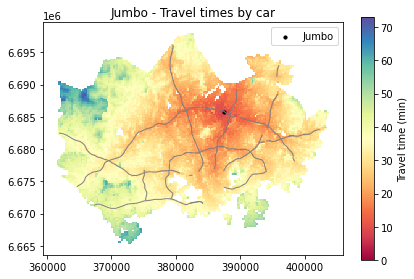

In [101]:
# Aggregate data_geo by car travel times 
jumbo_car = data_geo.dissolve(by='car_r_t')
jumbo_car.reset_index(inplace=True)

# Select useful columns
jumbo_car = jumbo_car[['car_r_t', 'geometry']]

# Create subplots
fig, ax = plt.subplots(figsize=(6,4))

# Plotting
jumbo_car.plot(ax=ax, column = "car_r_t",
          linewidth=0.03, 
          cmap="Spectral",  
          legend=True, 
          legend_kwds={'label': "Travel time (min)"}
          )

jumbo.plot(ax=ax, color='black', markersize=10)

roads.plot(ax=ax, color="grey", linewidth=1)

# Set title and legend to plot
ax.set_title('Jumbo - Travel times by car')
plt.legend(['Jumbo'])

# Remove empty whitespace around the plots
plt.tight_layout()

# Define output filename for the figure
output_fig1 = "docs/jumbo_accessibility_car.png"

# Save the figure into disk
plt.savefig(output_fig1)